<a href="https://colab.research.google.com/github/young-hwanlee/CNN_Keras_MNIST/blob/master/CNN_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** There're not much to modify since this code is written using the high-level APIs(tf.keras).**

In [1]:
!git clone https://github.com/young-hwanlee/CNN_Keras_MNIST.git

Cloning into 'CNN_Keras_MNIST'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 42 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [2]:
ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data/
drwxr-xr-x 3 root root 4096 Sep  3 06:53 CNN_Keras_MNIST/


In [5]:
#%%
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## Import libraries and modules
import sys
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
# from tensorflow.python.keras import utils
# from tensorflow.python.keras.datasets import mnist
# from tensorflow.python.keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import utils
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau

## Set up the seed for reproducibility.
seed=42

# tf.reset_default_graph()           # It seems like it's only working in the old version.
# tf.set_random_seed(seed)       # It seems like it's only working in the old version.

tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(seed)
np.random.seed(seed)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
TensorFlow version :  2.6.0
Keras version :  2.6.0


In [6]:
## Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Preprocess input data
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Reserve 10,000 samples for validation
X_train = X_train[:-10000]
y_train = y_train[:-10000]
X_val = X_train[-10000:]
y_val = y_train[-10000:]

## Preprocess class labels
num_classes = 10

# Y_train = utils.to_categorical(y_train, num_classes)     # It seems like it's only working in the old version.
# Y_val = utils.to_categorical(y_val, num_classes)            # It seems like it's only working in the old version.
# Y_test = utils.to_categorical(y_test, num_classes)         # It seems like it's only working in the old version.

Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
Y_val = tf.keras.utils.to_categorical(y_val, num_classes)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
## Define model architecture
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3),
                        activation='relu', input_shape=input_shape))
model.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(3,3),
                        activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 32)          320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

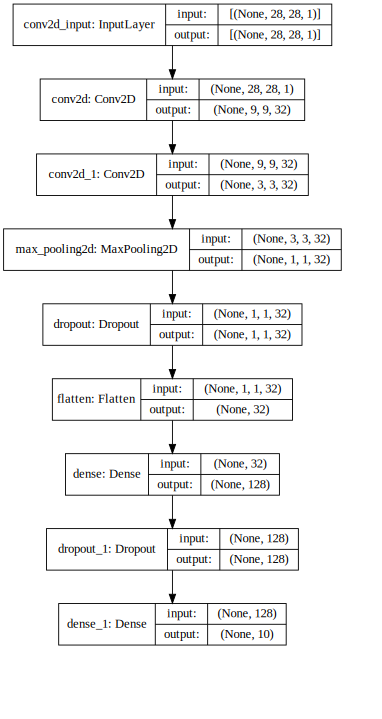

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [8]:
## Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit model on training data
# history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
#                  batch_size=32, nb_epoch=10, verbose=1)           # It seems like it's only working in the old version.
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                 batch_size=32, epochs=10, verbose=1)

## Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9647 - accuracy: 0.6926 - val_loss: 0.4810 - val_accuracy: 0.8527
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6097 - accuracy: 0.8154 - val_loss: 0.3721 - val_accuracy: 0.8856
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5265 - accuracy: 0.8392 - val_loss: 0.3186 - val_accuracy: 0.9032
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4846 - accuracy: 0.8515 - val_loss: 0.2978 - val_accuracy: 0.9085
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4529 - accuracy: 0.8630 - val_loss: 0.2723 - val_accuracy: 0.9194
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4390 - accuracy: 0.8685 - val_loss: 0.2595 - val_accuracy: 0.9207
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4210 - accuracy: 0.8741 - val_loss: 0.2495 - val_accuracy:

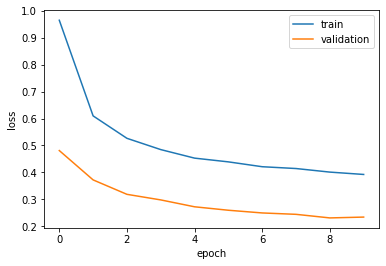

In [11]:
#%%
## Check the results
# Plots the loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

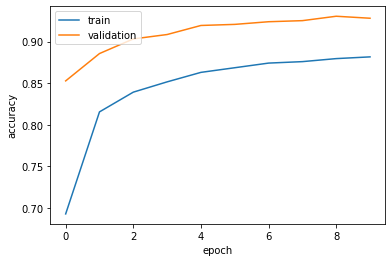

In [12]:
# Plots the accuracy
plt.figure()
# plt.plot(history.history['acc'])                  # It seems like it's only working in the old version.
# plt.plot(history.history['val_acc'])          # It seems like it's only working in the old version.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

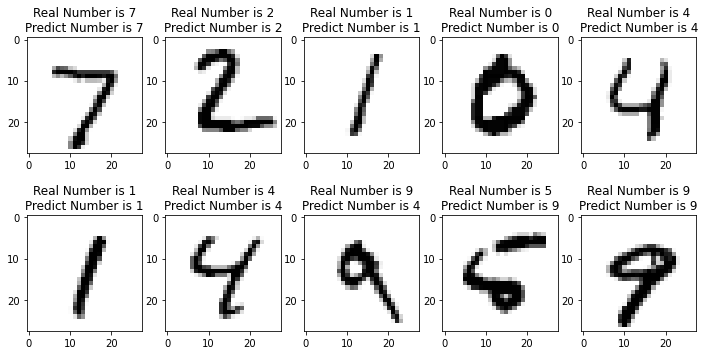

In [14]:
## Predict using the test dataset
Y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], img_rows, img_cols)

# fig, axis = plt.subplots(2, 5, figsize=(12, 14))          # The gap between the 1st row and the 2nd row is large.
fig, axis = plt.subplots(2, 5, figsize=(12,6))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_test[i].argmax()}\n"
                   f"Predict Number is {Y_pred[i].argmax()}")